In [ ]:
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.8 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.15-py2.py3-none-any.whl size=32026 sha256=679b4f90cfc0bb5917ad72f4468c535bde9ba09ddf395e85478cf11ea91bcfd1
  Stored in directory: /root/.cache/pip/wheels/43/7a/bb/396851d7ac5c4c9342ec8657593da1eee1bad1854e54d51d81
Successfully built jcopml


In [ ]:
import pandas as pd
data = pd.read_csv('titanic.csv', index_col='PassengerId')
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace = True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### EDA (Exploratory Data Analyst)

In [ ]:
# Target
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

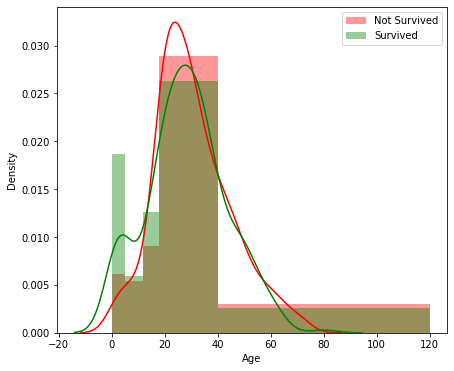

In [ ]:
# Age Vs Target
plt.figure(figsize=(7,6))
sns.distplot(data.Age[data.Survived == 0], bins =[0, 5, 12, 18, 40, 120], color='r', label= 'Not Survived')
sns.distplot(data.Age[data.Survived == 1], bins =[0, 5, 12, 18, 40, 120], color='g', label= 'Survived')
plt.legend();


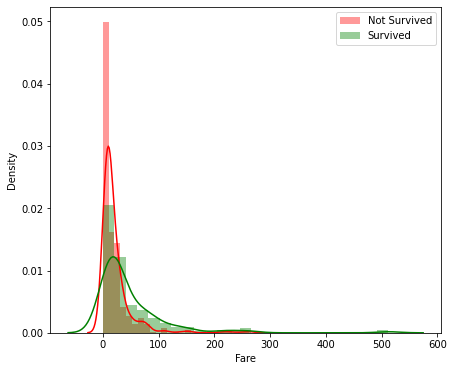

In [ ]:
# Fare Vs Target
plt.figure(figsize=(7,6))
sns.distplot(data.Fare[data.Survived == 0], bins = 25, color='r', label= 'Not Survived')
sns.distplot(data.Fare[data.Survived == 1], bins = 25, color='g', label= 'Survived')
plt.legend();

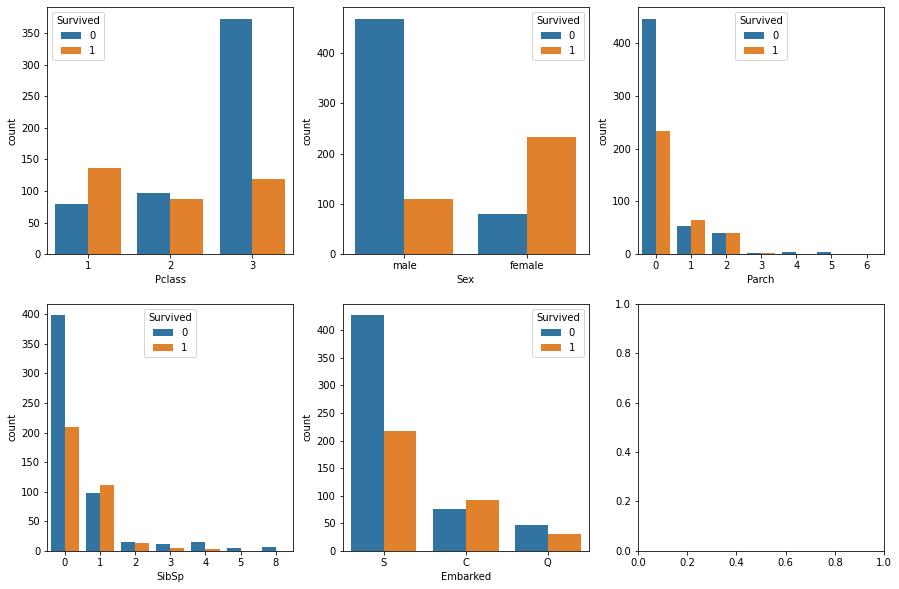

In [ ]:
from IPython.core.pylabtools import figsize
# Category Vs Target
cata_var = ['Pclass', 'Sex','Parch', 'SibSp', 'Embarked']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cata_var, axes.flatten()):
  sns.countplot(cat, data=data, hue='Survived', ax=ax)


### Feature Engineering

In [ ]:
# Menambah kolom baru
data['isAlone'] = (data.SibSp == 0) & (data.Parch == 0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


In [ ]:
# Binning (Kategori) Age
data.Age = pd.cut(data.Age, [0, 5, 12, 18, 40, 120], labels=['balita', 'anak-anak', 'remaja', 'dewasa', 'lansia'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


In [ ]:
# Binning (Kategori) Age
data.Fare = pd.cut(data.Fare, [0, 25, 100, 600], labels=['murah', 'mahal', 'eksekutif'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True


### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns='Survived')
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
#numerical_pipeline = Pipeline([
                              # ('imputer', SimpleImputer(strategy='mean')),
                              # ('scaler', MinMaxScaler())
#])

categorical_pipeline = Pipeline([
                                 ('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('scaler', OneHotEncoder())
])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer([
                                 # ('numeric', numerical_pipeline, ['SibSp', 'Parch', 'Fare']),
                                  ('categoric', categorical_pipeline, ['Pclass', 'Sex', 'Embarked', 'Fare', 'Age', 'isAlone'])
])

### Input Algoritma

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', KNeighborsClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Fare', 'Age',
                                                   'isAlone'])])),
                ('algo', KNeighborsClassifier())])

In [ ]:
pipeline.score(X_test, y_test)

0.7932960893854749

### GridSearchCV K-NN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {
    'algo__n_neighbors': range(1, 51, 2),
    'algo__weights': ['uniform', 'distance'],
    'algo__p': [1, 2]
     
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          OneHotEncoder())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'Fare',
                                                                       

In [ ]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,0.035636,0.011817,0.039445,0.018376,7,2,uniform,"{'algo__n_neighbors': 7, 'algo__p': 2, 'algo__...",0.806723,0.843882,0.831224,0.827276,0.015425,1
12,0.037321,0.016114,0.063815,0.013872,7,1,uniform,"{'algo__n_neighbors': 7, 'algo__p': 1, 'algo__...",0.806723,0.843882,0.831224,0.827276,0.015425,1
16,0.020189,0.008685,0.039353,0.013718,9,1,uniform,"{'algo__n_neighbors': 9, 'algo__p': 1, 'algo__...",0.815126,0.835443,0.818565,0.823045,0.008879,3
18,0.026706,0.007332,0.024547,0.006462,9,2,uniform,"{'algo__n_neighbors': 9, 'algo__p': 2, 'algo__...",0.815126,0.835443,0.818565,0.823045,0.008879,3
22,0.040481,0.007858,0.045790,0.010891,11,2,uniform,"{'algo__n_neighbors': 11, 'algo__p': 2, 'algo_...",0.806723,0.831224,0.818565,0.818837,0.010004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.025675,0.005925,0.039322,0.007913,49,1,uniform,"{'algo__n_neighbors': 49, 'algo__p': 1, 'algo_...",0.764706,0.763713,0.734177,0.754199,0.014163,95
3,0.018550,0.004855,0.017881,0.008692,1,2,distance,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",0.714286,0.729958,0.738397,0.727547,0.009990,97
2,0.031004,0.013626,0.042271,0.007712,1,2,uniform,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",0.714286,0.729958,0.738397,0.727547,0.009990,97
1,0.022720,0.011604,0.016901,0.005137,1,1,distance,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",0.714286,0.729958,0.738397,0.727547,0.009990,97


In [ ]:
model.best_params_
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8300561797752809, 0.8156424581005587)

### RandomSearchCV Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
rsp.rf_params

{'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20),
 'algo__n_estimators': Integer(low=100, high=200)}

In [ ]:
categorical_pipeline = Pipeline([
                                 ('imputer', SimpleImputer(strategy='most_frequent')),
                                 ('scaler', OneHotEncoder())
])

preprocessor = ColumnTransformer([
                                 # ('numeric', numerical_pipeline, ['SibSp', 'Parch', 'Fare']),
                                  ('categoric', categorical_pipeline, ['Pclass', 'Sex', 'Age'])
])

pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('categoric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('scaler',
                                                                                                OneHotEncoder())]),
                                                                               ['Pclass',
                                                                                'Sex',
                                                                                'Age'])])),
                                             ('algo',
                                       

In [ ]:
print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

{'algo__max_depth': 31, 'algo__max_features': 0.2197093534766683, 'algo__min_samples_leaf': 7, 'algo__n_estimators': 184}
0.8216292134831461 0.7877094972067039


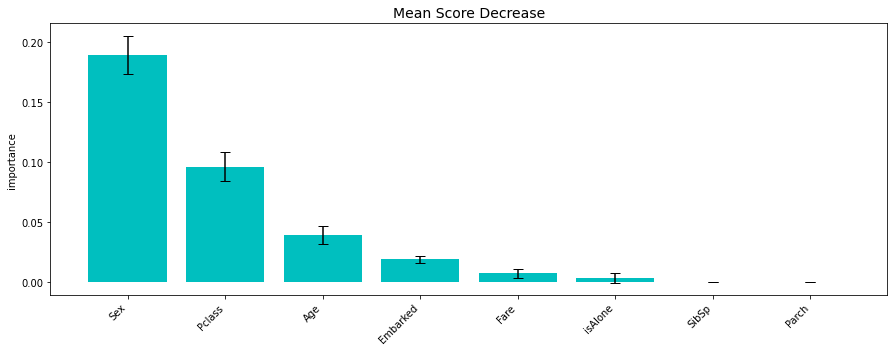

In [ ]:
from jcopml.feature_importance import mean_score_decrease
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

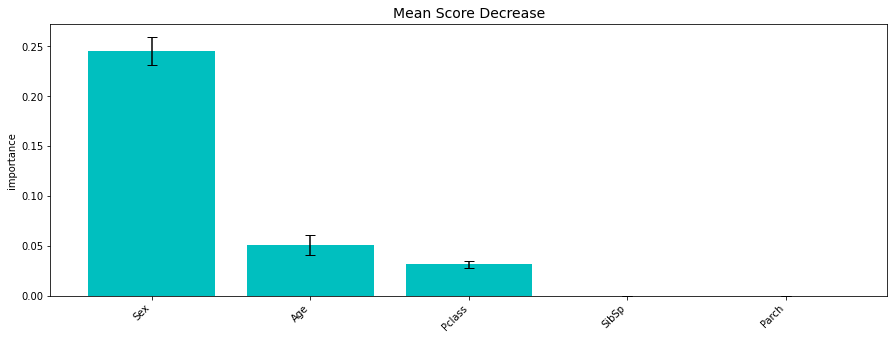

In [ ]:
from jcopml.feature_importance import mean_loss_decrease
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)